In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib notebook

In [2]:
sns.set_style("whitegrid")

In [3]:
r2 = lambda x: round(x,2)
r4 = lambda x: round(x,4)

In [4]:
apps = pd.read_csv("googleplaystore.csv")

In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
sum(apps.duplicated())

483

In [7]:
apps = apps.drop_duplicates().reset_index(drop=True)

In [8]:
apps = apps[apps.Rating.notnull()]

In [9]:
cols_to_clean = ["Installs","Price"]
char_to_replace = [ "+","$",","]

for col in cols_to_clean:
    for char in char_to_replace:
        apps[col] = apps[col].apply(lambda x: x.replace(char,""))

In [10]:
rows_to_drop = apps[(apps.Price == "Everyone")|(apps.Installs == "Free")].index

In [11]:
apps = apps.drop(rows_to_drop).reset_index(drop=True)

In [12]:
apps["Last Updated"] = pd.to_datetime(apps["Last Updated"]).dt.date

In [13]:
apps = apps.astype({"Installs":float
                    ,"Price":float})

In [14]:
apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [15]:
cateFreq = (
    pd.crosstab(index=apps.Category, columns="Count")
      .sort_values(by="Count", ascending=False)
      .reset_index()
)

<IPython.core.display.Javascript object>


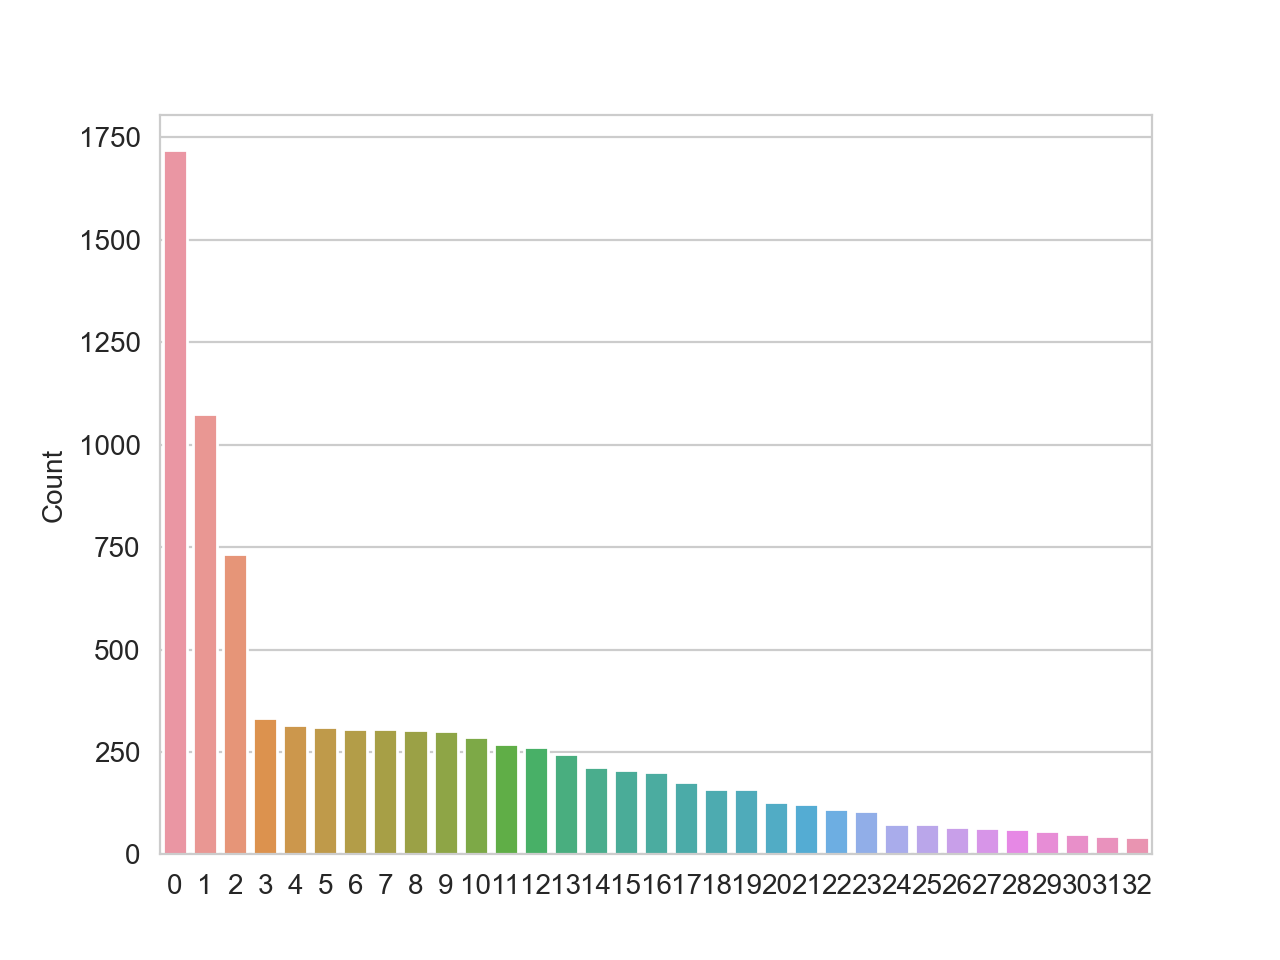

In [16]:
plt.figure()
sns.barplot(x=cateFreq.index, y=cateFreq.Count)
plt.show()

In [17]:
cateFreq.head()

col_0,Category,Count
0,FAMILY,1718
1,GAME,1074
2,TOOLS,734
3,PRODUCTIVITY,334
4,FINANCE,317


In [18]:
cumFreq = r4(np.cumsum(cateFreq.Count) / sum(cateFreq.Count))

In [19]:
relFreq = cateFreq.Count / sum(cateFreq.Count)

In [20]:
cateFreq["Relative Frequency"] = relFreq
cateFreq["Cumulative Frequency"] = cumFreq

In [21]:
cateFreq.head(14)

col_0,Category,Count,Relative Frequency,Cumulative Frequency
0,FAMILY,1718,0.193207,0.1932
1,GAME,1074,0.120783,0.3140
2,TOOLS,734,0.082546,0.3965
3,PRODUCTIVITY,334,0.037562,0.4341
4,FINANCE,317,0.035650,0.4697
5,PERSONALIZATION,310,0.034863,0.5046
6,COMMUNICATION,307,0.034525,0.5391
7,LIFESTYLE,305,0.034300,0.5734
8,PHOTOGRAPHY,304,0.034188,0.6076
9,MEDICAL,302,0.033963,0.6416


In [22]:
rate_mean = r2(np.mean(apps.Rating))
rate_median = r2(np.median(apps.Rating))
rate_skew = r2(stats.skew(apps.Rating))

<IPython.core.display.Javascript object>


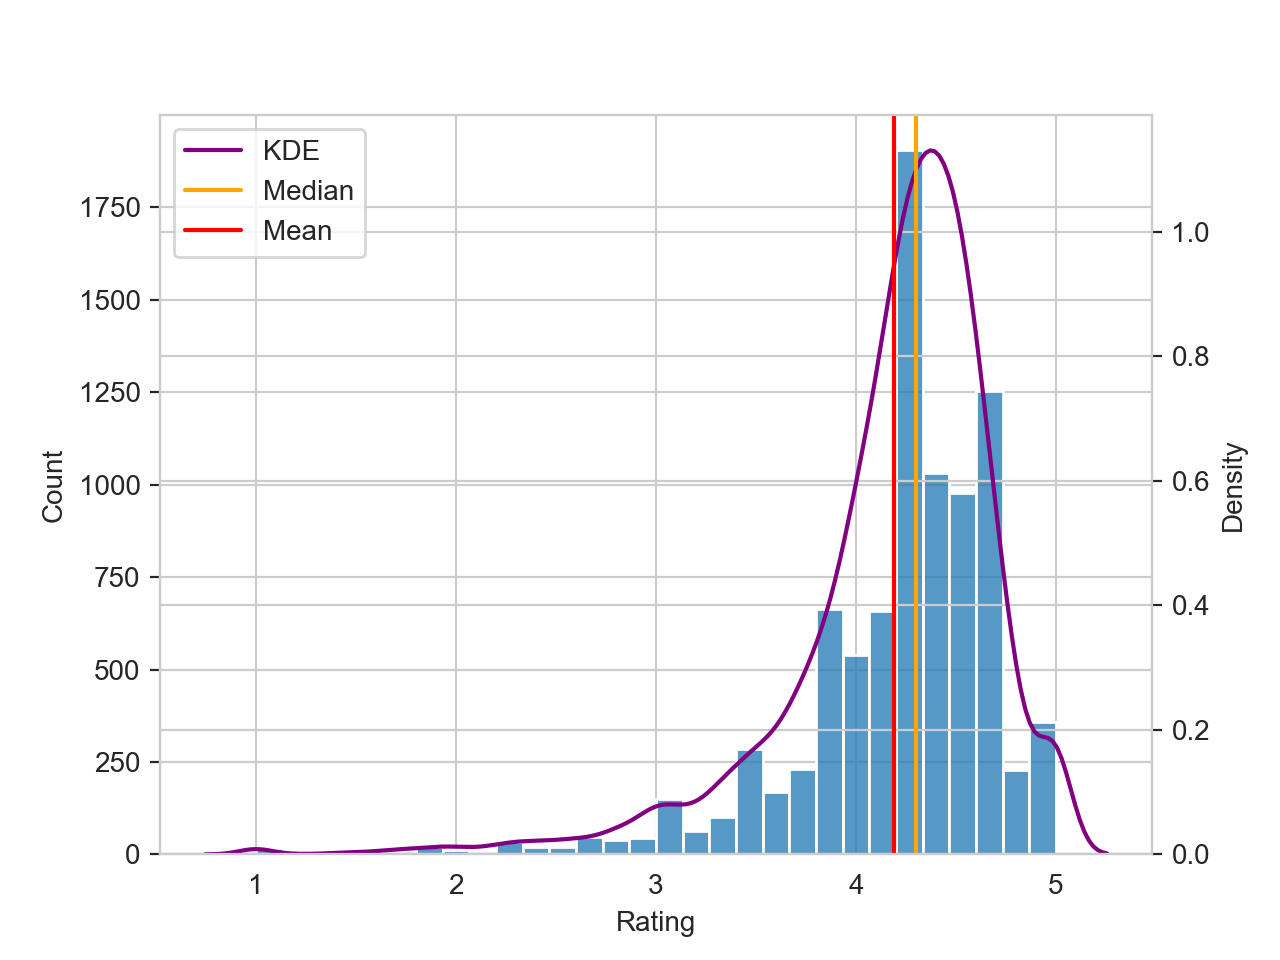

Mean Rating: 4.19
Median Rating: 4.3
Rating skewness: -1.82


In [23]:
fig, ax = plt.subplots()
sns.histplot(apps.Rating,bins=30)
ax2 = ax.twinx()
sns.kdeplot(apps.Rating,color="purple",ax=ax2, label="KDE")
plt.axvline(x=rate_median,color="orange",label="Median")
plt.axvline(x=rate_mean,color="red",label="Mean")
plt.legend()
plt.show()
print(
       "Mean Rating: {}".format(rate_mean)
     + "\n"
     + "Median Rating: {}".format(rate_median)
     + "\n"
     +"Rating skewness: {}".format(rate_skew)
     )

In [24]:
apps_with_size_and_rating_present = (

                apps[(apps["Rating"].notnull())
                    &(apps["Size"].notnull())]
)

In [25]:
large_categories = apps_with_size_and_rating_present.groupby(by="Category").filter(lambda x: len(x) >= 250)

<IPython.core.display.Javascript object>


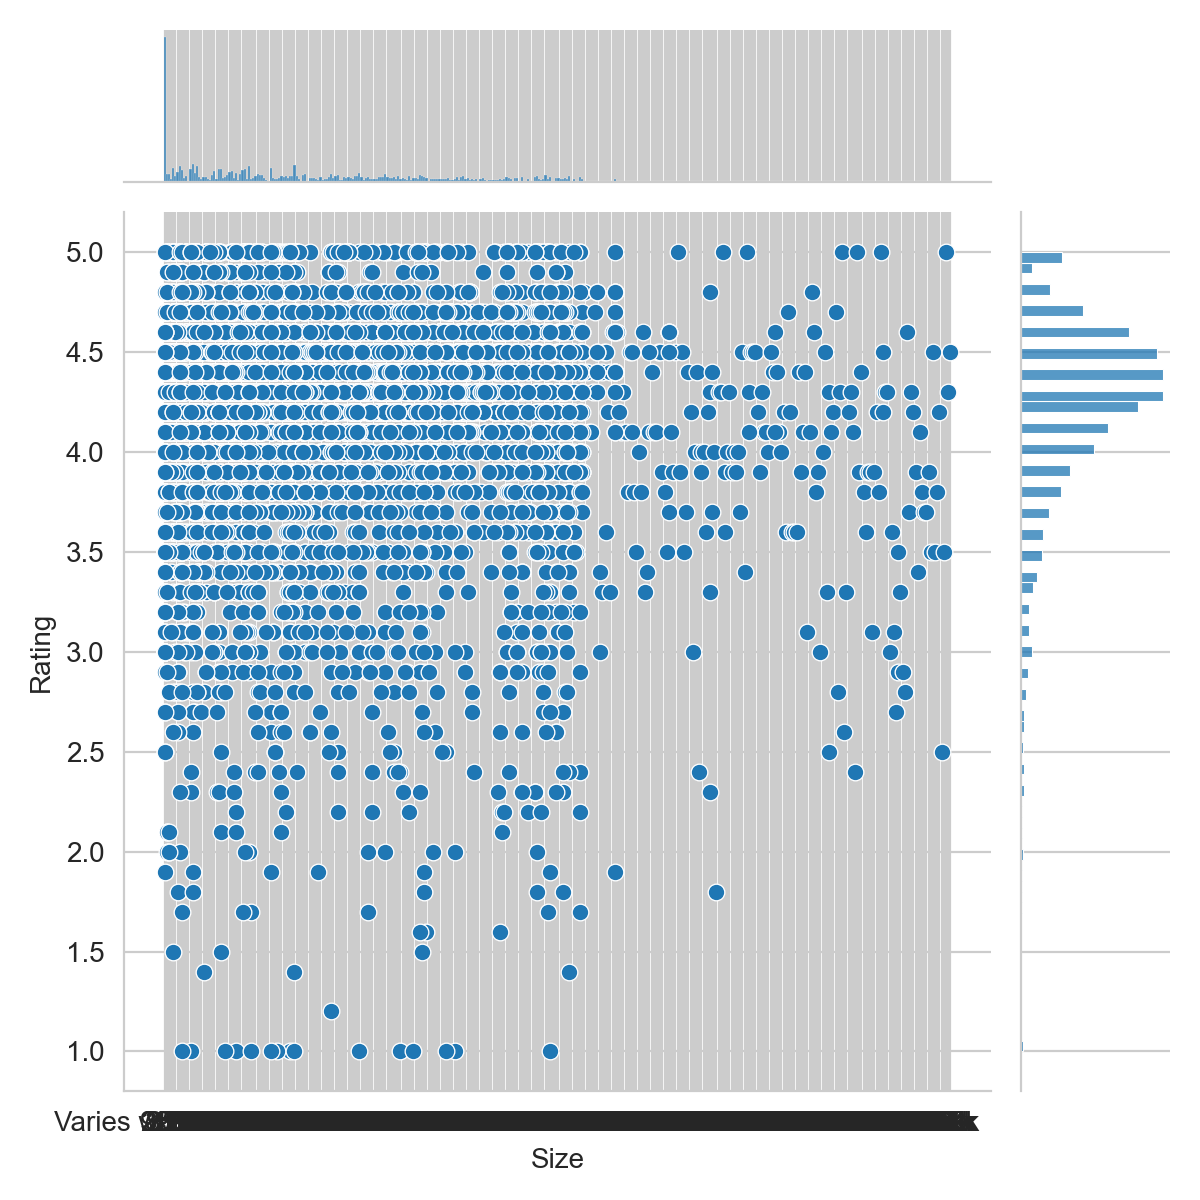

In [26]:
sns.jointplot(x=large_categories["Size"], y=large_categories["Rating"])
plt.show()

In [27]:
paid_apps = large_categories[large_categories["Type"] == "Paid"].reset_index(drop=True)

<IPython.core.display.Javascript object>


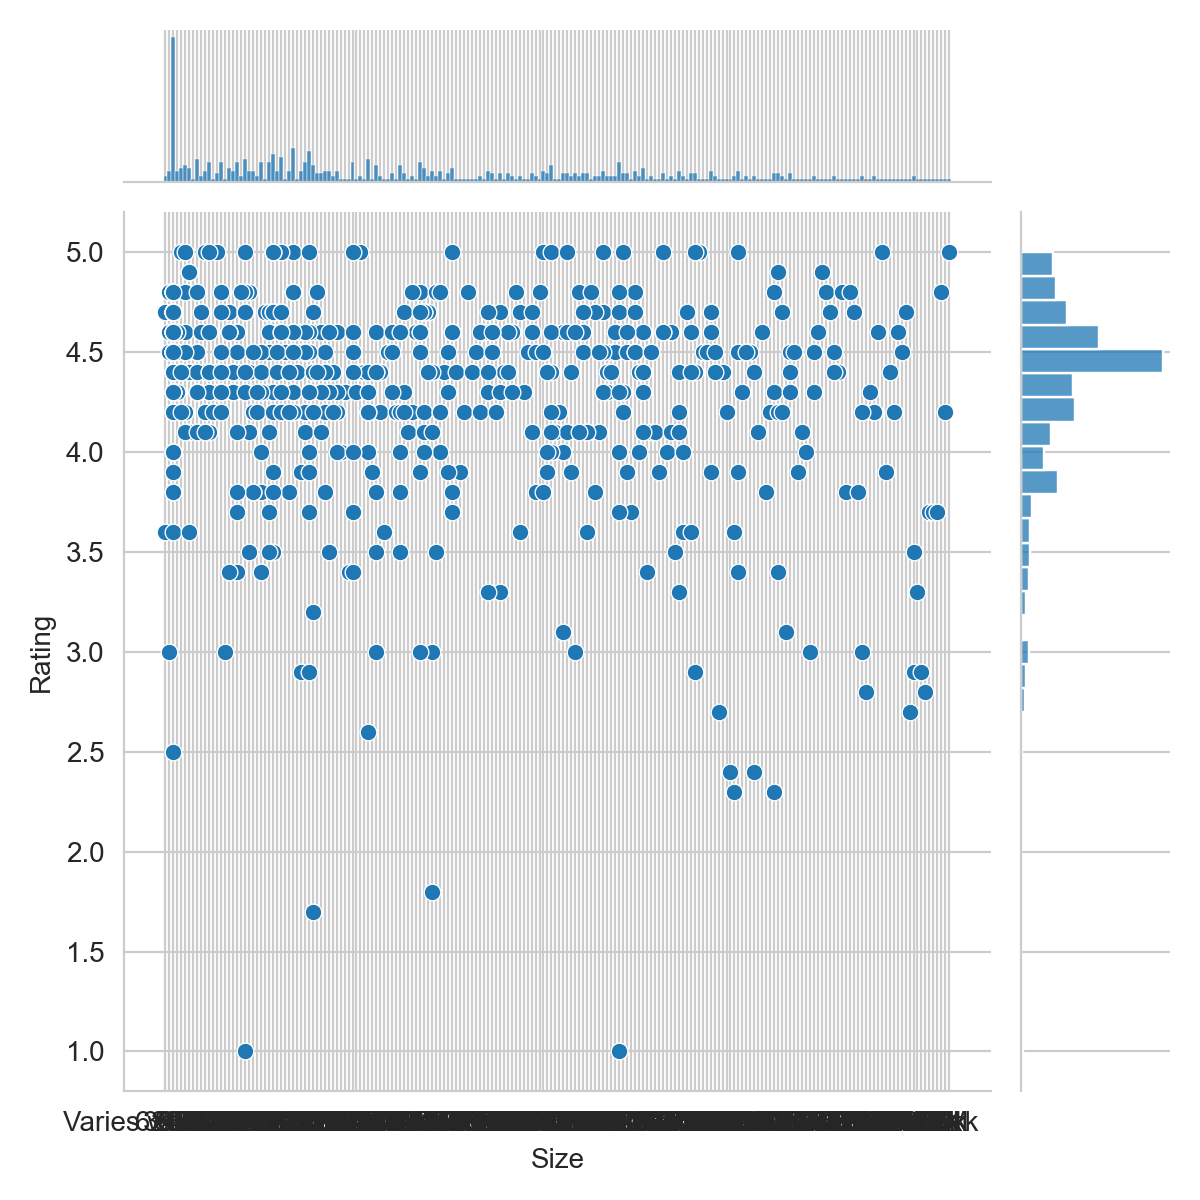

In [28]:
sns.jointplot(x=paid_apps["Size"], y=paid_apps["Rating"])
plt.show()

In [29]:
large_categories.Category.unique()

array(['BUSINESS', 'COMMUNICATION', 'FINANCE', 'HEALTH_AND_FITNESS',
       'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'PHOTOGRAPHY', 'SPORTS',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY'], dtype=object)

In [30]:
popular_apps = apps[apps.Category.isin(['BUSINESS', 'FINANCE','LIFESTYLE'
                                       ,'GAME', 'FAMILY', 'MEDICAL',
                                        'PHOTOGRAPHY','TOOLS'])]



In [31]:
popular_apps.reset_index(drop=True, inplace=True)

In [32]:
popular_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,10000000.0,Free,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
1,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,50000000.0,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
2,Uber Driver,BUSINESS,4.4,1254730,Varies with device,10000000.0,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,5000000.0,Free,0.0,Everyone,Business,2018-07-17,3.4.2,5.0 and up
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,1000000.0,Free,0.0,Everyone,Business,2018-05-04,Varies with device,Varies with device


<IPython.core.display.Javascript object>


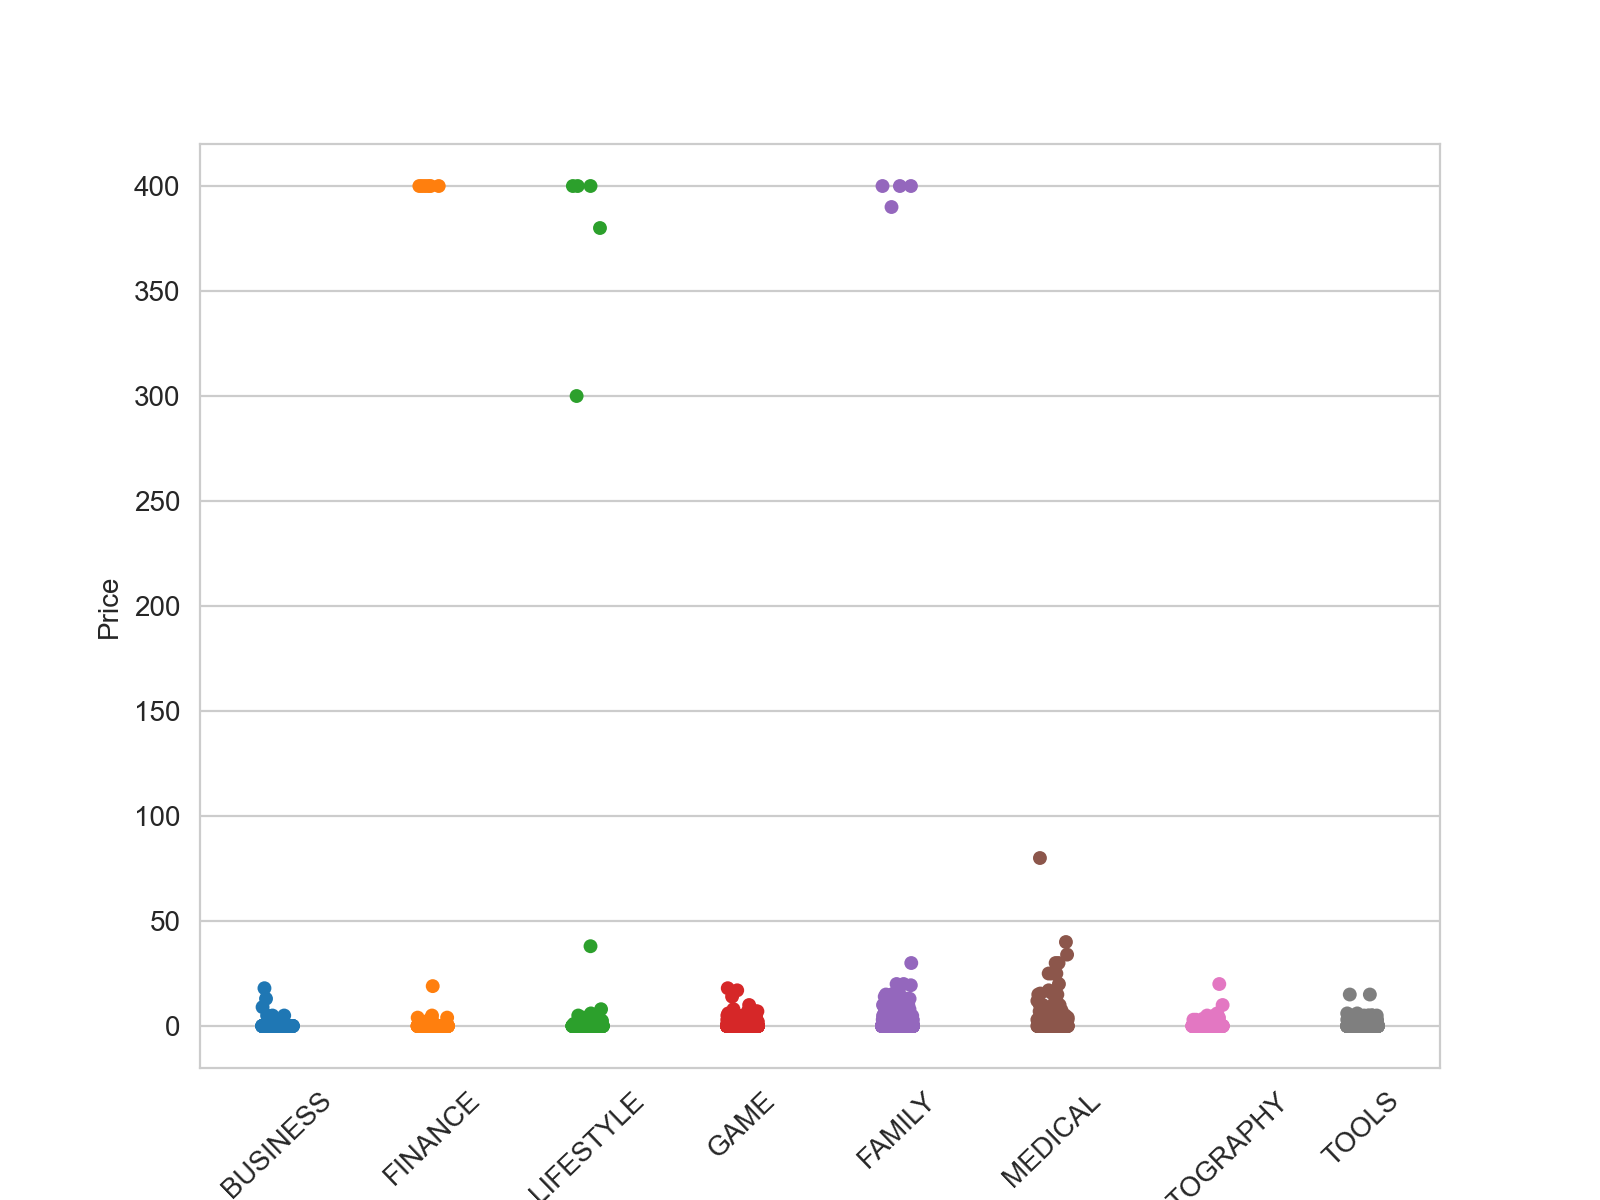

In [33]:
plt.figure(figsize=(8,6))
sns.stripplot(x=popular_apps['Category'], y=popular_apps['Price'])
plt.xticks(rotation=44)
plt.show()

<IPython.core.display.Javascript object>


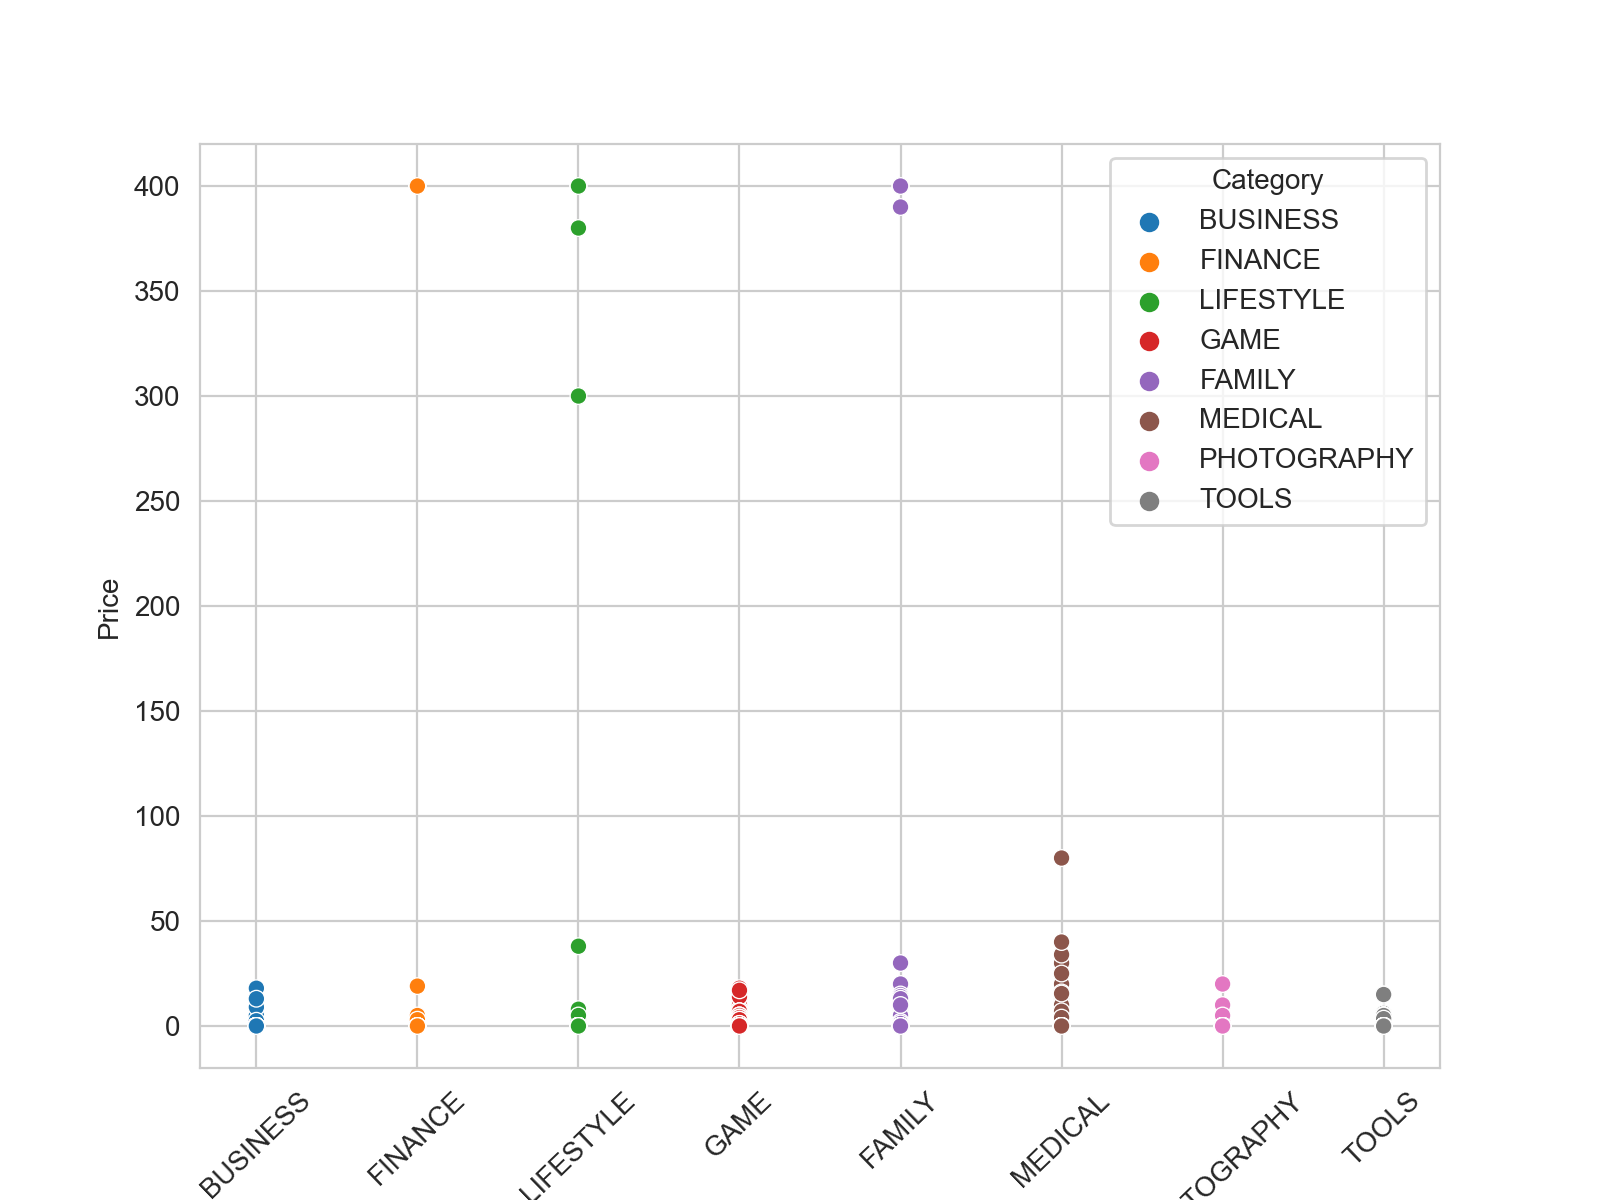

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=popular_apps['Category'], y=popular_apps['Price'], hue=popular_apps['Category'])
plt.xticks(rotation=44)
plt.show()

In [35]:
popular_apps_over_200 = popular_apps[popular_apps.Price > 200].reset_index(drop=True)

In [36]:
popular_apps_over_200[["Category","App","Price"]]

,Category,App,Price
0,FAMILY,most expensive app (H),399.99
1,LIFESTYLE,💎 I'm rich,399.99
2,LIFESTYLE,I'm Rich - Trump Edition,400.00
3,LIFESTYLE,I am rich,399.99
4,FAMILY,I am Rich Plus,399.99
5,LIFESTYLE,I am rich VIP,299.99
6,FINANCE,I Am Rich Premium,399.99
7,LIFESTYLE,I am extremely Rich,379.99
8,FINANCE,I am Rich!,399.99
9,FINANCE,I am rich(premium),399.99


In [37]:
apps_under_100 = popular_apps[popular_apps.Price < 100]

In [38]:
apps_under_100.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,10000000.0,Free,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
1,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,50000000.0,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device


<IPython.core.display.Javascript object>


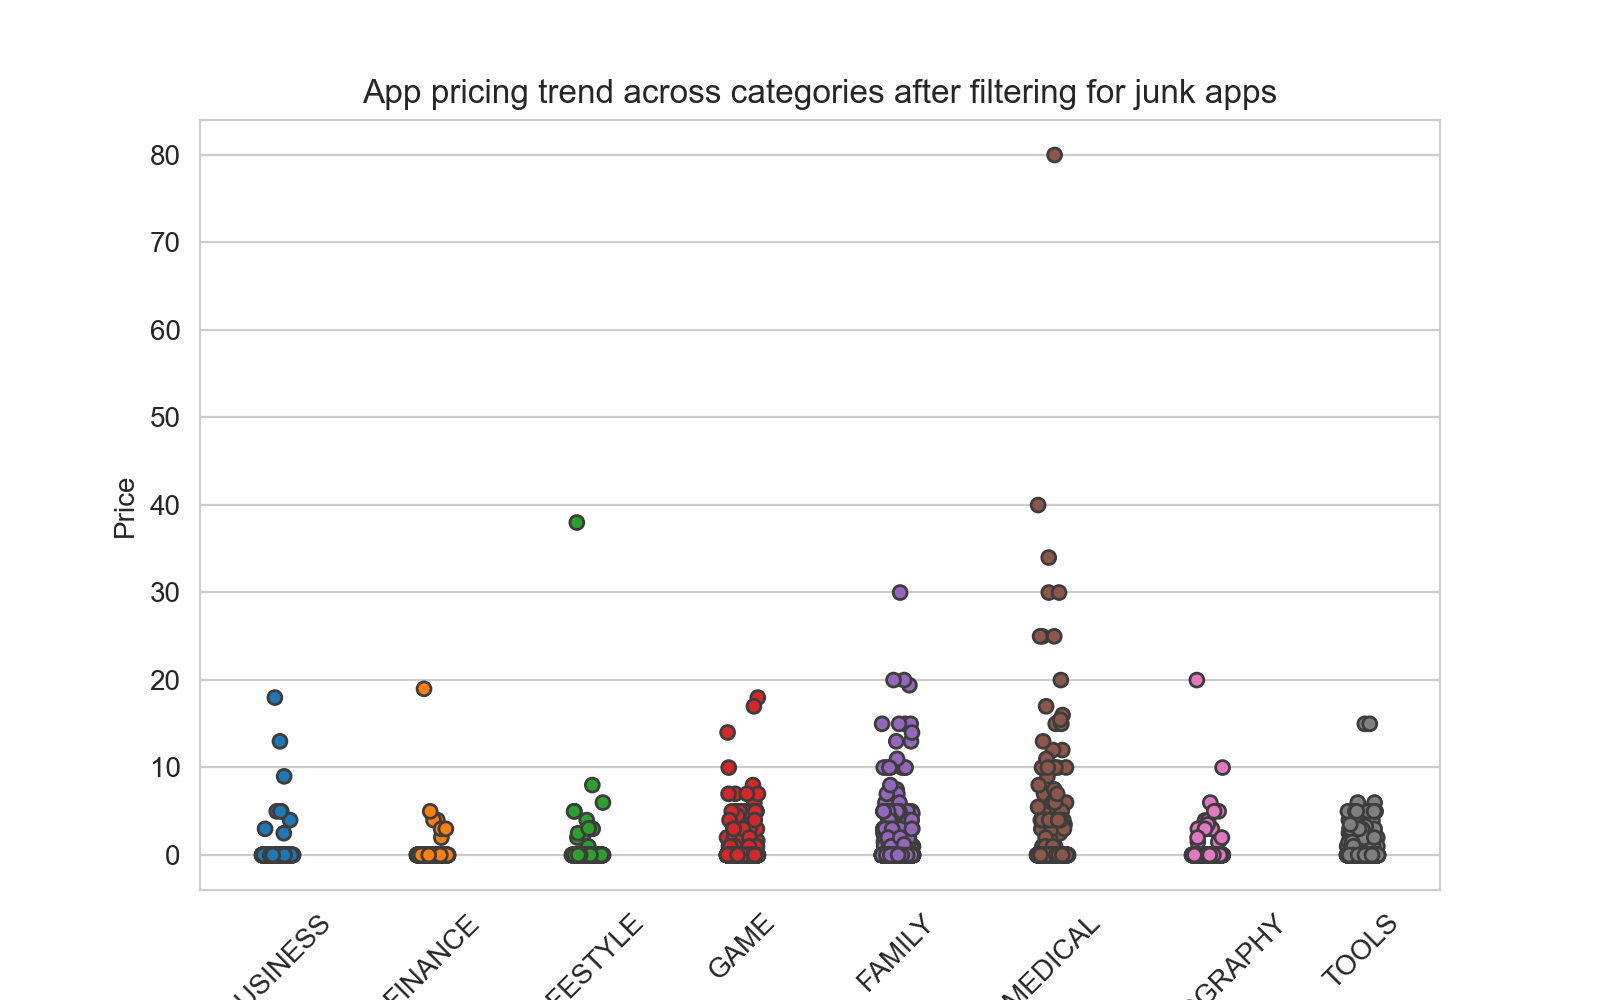

In [39]:
fig, ax = plt.subplots(figsize=(8,5))

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = "Category", y = "Price", data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.xticks(rotation=45)
plt.show()

In [40]:
apps_under_100.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [41]:
top_cat_des = (
                    apps_under_100[apps_under_100.Type == "Paid"]
                    .reset_index(drop=True)
                    .groupby(by="Category")
                    .describe()["Price"]
                ).reset_index()

In [42]:
top_cat_des

,Category,count,mean,std,min,25%,50%,75%,max
0,BUSINESS,9.0,7.156667,5.220153,2.49,3.990,4.99,8.99,17.99
1,FAMILY,154.0,4.498831,4.312803,0.99,1.990,2.99,4.99,29.99
2,FINANCE,7.0,5.704286,5.936168,1.99,2.990,3.99,4.49,18.99
3,GAME,77.0,3.641039,3.278193,0.99,0.990,2.99,4.99,17.99
4,LIFESTYLE,13.0,6.224615,9.753149,0.99,2.490,3.04,4.99,37.99
5,MEDICAL,64.0,10.138438,12.446598,0.99,2.990,5.49,11.99,79.99
6,PHOTOGRAPHY,16.0,4.766250,4.568823,1.49,2.740,3.24,4.99,19.99
7,TOOLS,63.0,3.300000,2.585702,0.99,1.865,2.99,3.99,14.99


<IPython.core.display.Javascript object>


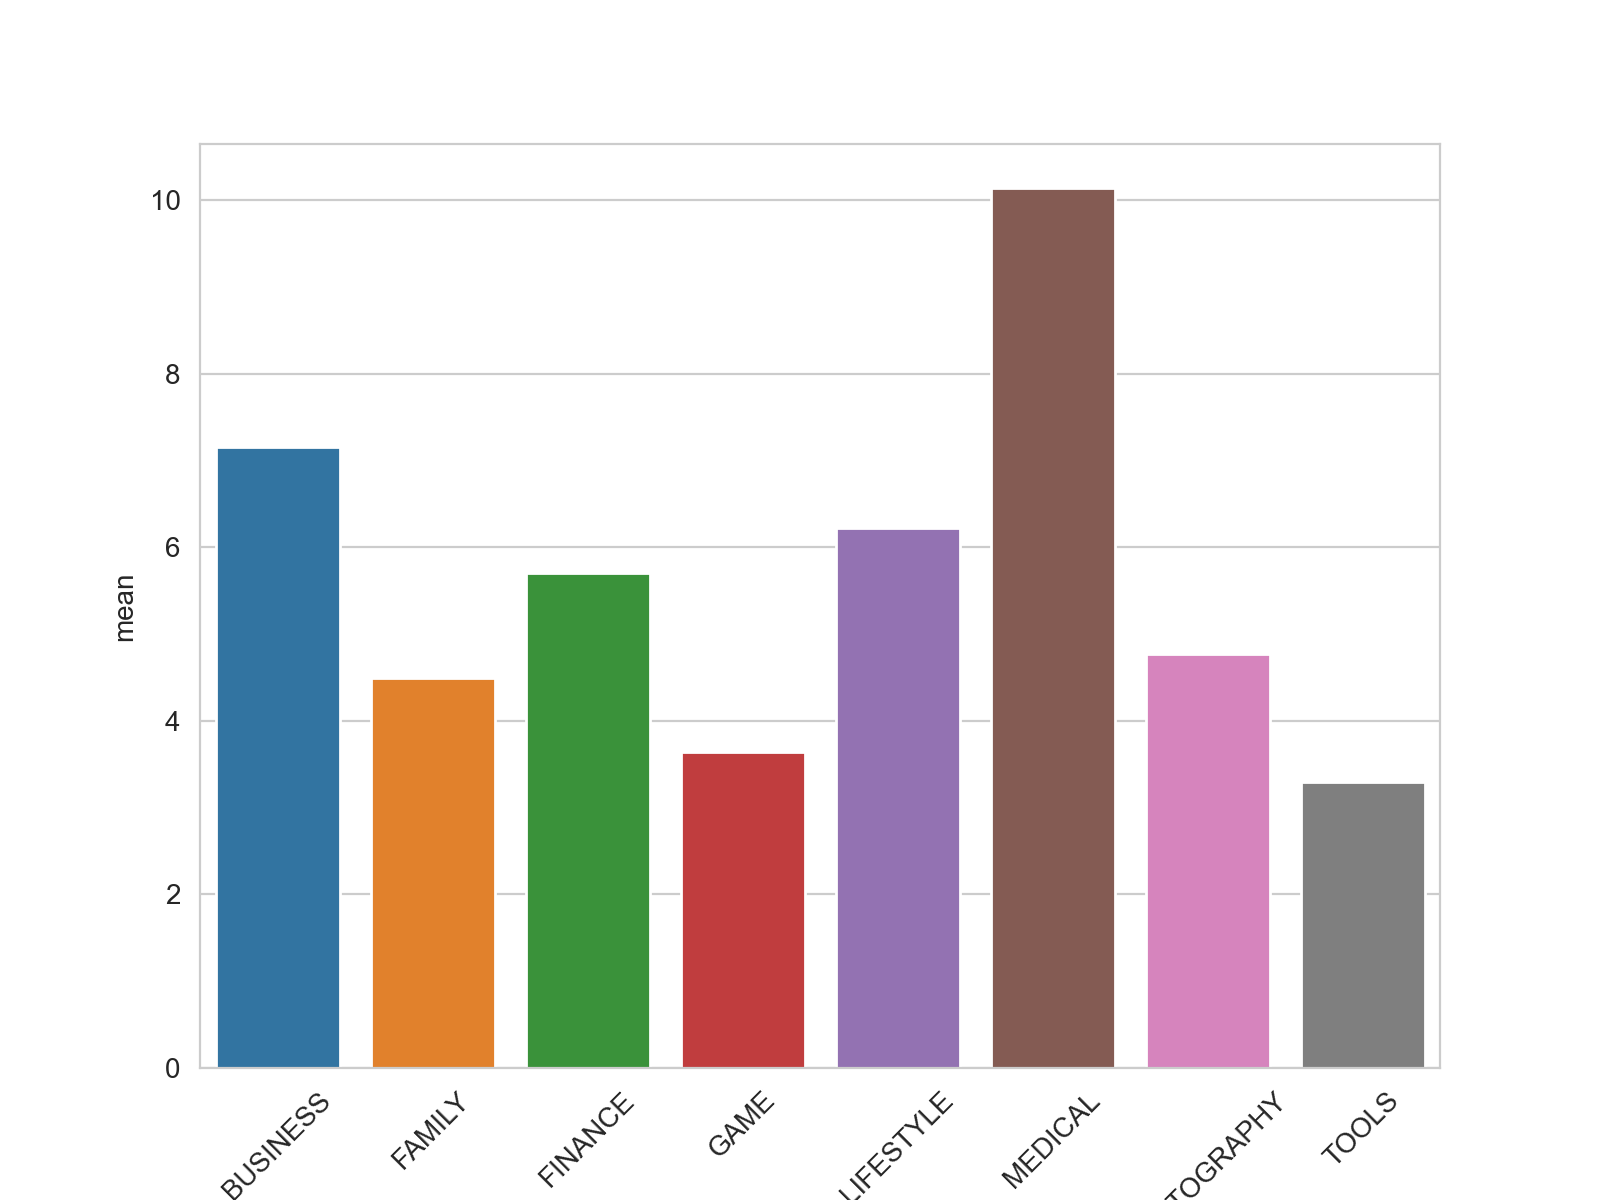

In [43]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=top_cat_des,x="Category",y="mean")
plt.xticks(rotation=45)
plt.show()

In [44]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [45]:
# Load user_reviews.csv
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [46]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [47]:
reviews_df = reviews_df.dropna(how="any").reset_index(drop=True)

In [48]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [49]:
reviews_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


In [50]:
# Join the two dataframes
merged_df = pd.merge(apps,reviews_df,on="App")

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59124 entries, 0 to 59123
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59124 non-null  object 
 1   Category                59124 non-null  object 
 2   Rating                  59124 non-null  float64
 3   Reviews                 59124 non-null  object 
 4   Size                    59124 non-null  object 
 5   Installs                59124 non-null  float64
 6   Type                    59124 non-null  object 
 7   Price                   59124 non-null  float64
 8   Content Rating          59124 non-null  object 
 9   Genres                  59124 non-null  object 
 10  Last Updated            59124 non-null  object 
 11  Current Ver             59124 non-null  object 
 12  Android Ver             59124 non-null  object 
 13  Translated_Review       59124 non-null  object 
 14  Sentiment               59124 non-null

In [52]:
merged_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000


<IPython.core.display.Javascript object>


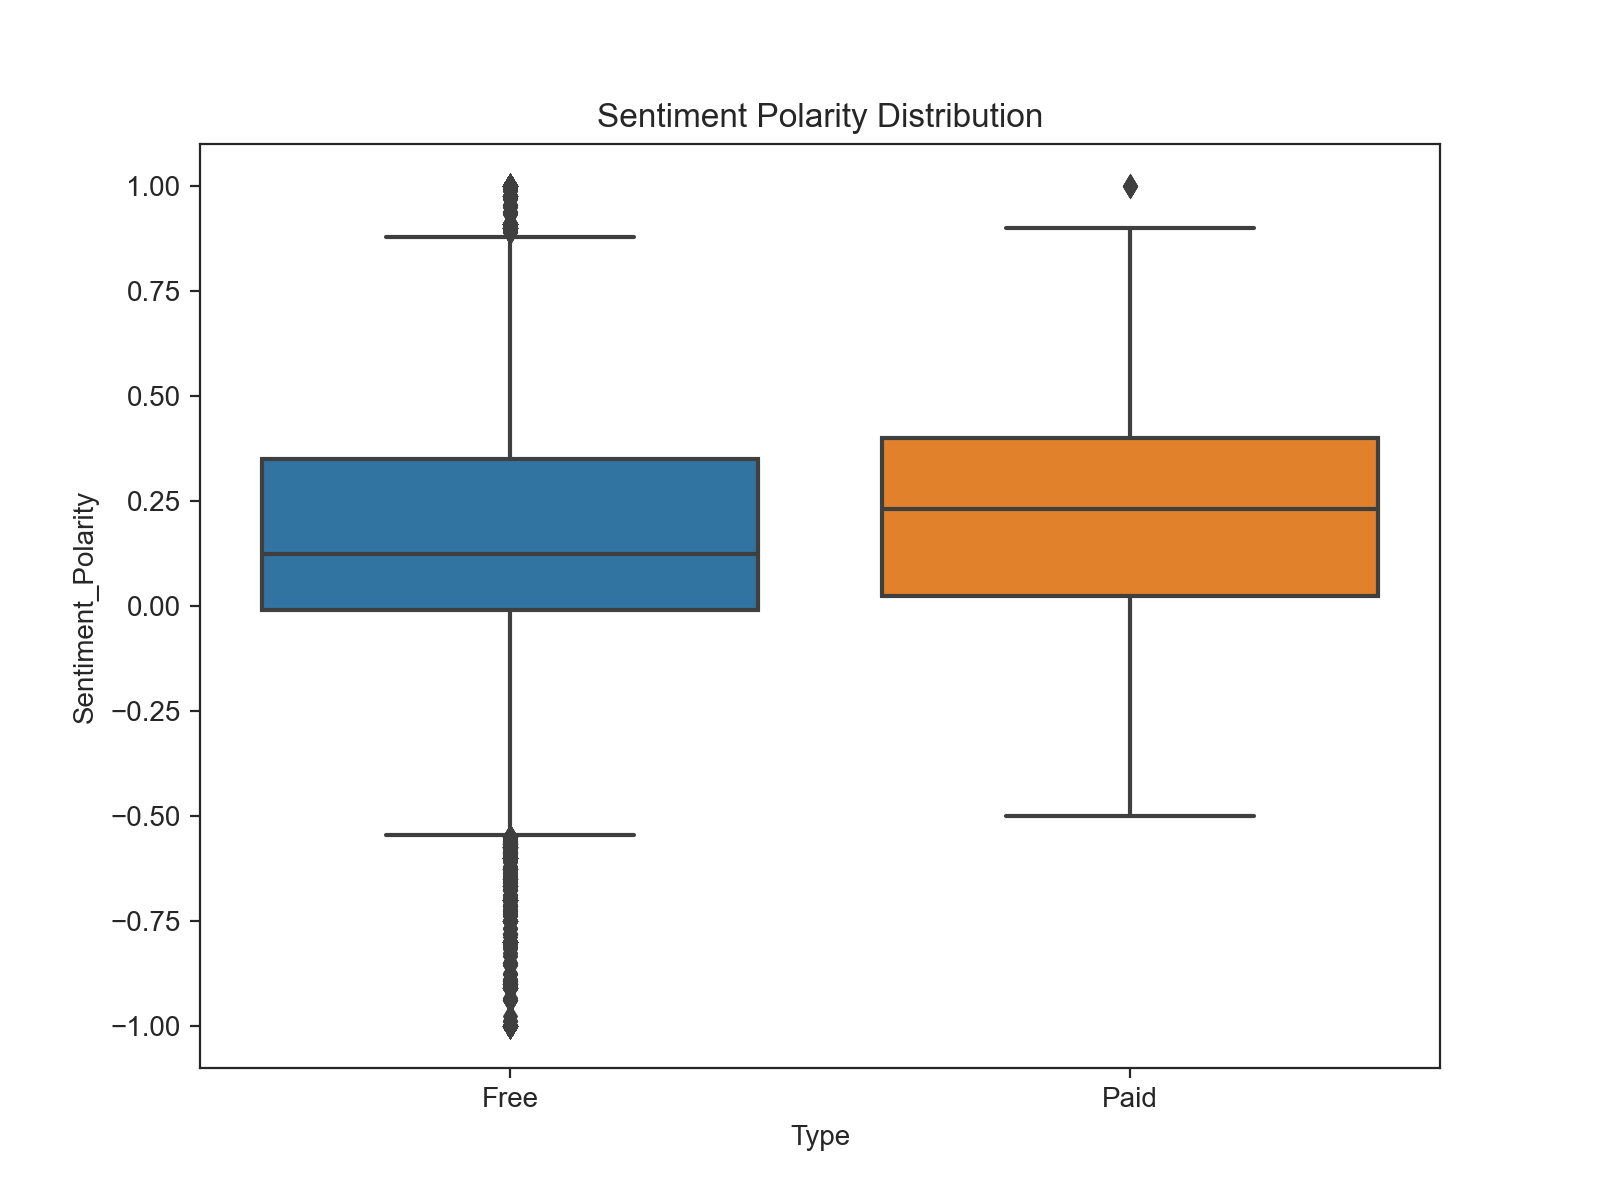

In [53]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(8,6))
# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.show()